# Generative Models

### Exercise 1 - Transposed Convolution

**Summary:**

In this exercise you will learn how to use the Conv2DTranspose layer to "scale-up" a feature map from a lower dimension to a higher dimension inside a CNN. 
I have provided you (cell below) with a stub of an autoencoder (the down-path). 
 
**Your Tasks in this exercise:**
* Add Conv2DTranspose layers to the autoencoder to match the input shape with the network's output shape. Use the ```model.summary()``` method to track and understand your progress. 

**Find out and Answer:**
* What is the impact of using different strides and padding settings? 
* What is the impact of using different kernel sizes ?
* How many filters should we use in each layer of the up-sampling path, what makes sense?




In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(2,2), padding='same'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 32)        8224      
                                                                 
Total params: 10,680
Trainable params: 10,680
Non-trainable params: 0
_________________________________________________________________


### Solution 1 - Transposed Convolution 

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(2,2), padding='same'))


model.add(Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Conv2DTranspose(filters=16, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2DTranspose(filters=3, kernel_size=(4,4), strides=(2,2), padding='same'))


model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 32)        8224      
                                                                 
 conv2d_transpose_34 (Conv2D  (None, 32, 32, 32)       9248      
 Transpose)                                                      
                                                                 
 conv2d_transpose_35 (Conv2D  (None, 64, 64, 16)       8208      
 Transpose)                                                      
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 128, 128, 3)    

### Exercise 2 - Autoencoder

**Summary:**

In this exercise you will create a *convolutional* autoencoder that can be used for the mnist data. 

**Data**: 

In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data. 
* Think about what *activation* functions make sense
* Make sure you build the autoencoder using the **U** architecture (see slides)
* 1x1 Conv2D layers can be used to "reshape" the final output
* Train the autoencoder using the training portion of the mnist data 
* Visualize your results 


**Find out and Answer:**
* Explain which activation functions you chose and why you chose them. 
* What happens if we use different kernel sizes in the Conv2D and the associated Conv2DTranspose layer.








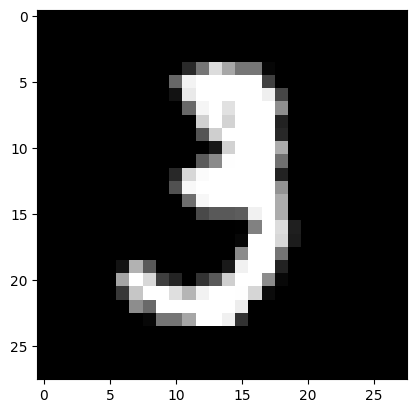

In [59]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[10,:], cmap='gray')

x_train = x_train / 255
x_test = x_test / 255

In [183]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer

mnist_ae = tf.keras.Sequential()
mnist_ae.add(InputLayer(input_shape=(28,28,1)))
mnist_ae.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), activation='relu', padding='same'))
mnist_ae.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), activation='relu', padding='same'))

mnist_ae.add(Conv2DTranspose(filters=16, kernel_size=(4,4), strides=(2,2),  activation='relu',padding='same'))
mnist_ae.add(Conv2DTranspose(filters=8, kernel_size=(4,4), strides=(2,2),  activation='relu',padding='same'))
mnist_ae.add(Conv2D(filters=1, kernel_size=(1,1),  activation='sigmoid',padding='same'))

mnist_ae.compile(loss='binary_crossentropy')
mnist_ae.summary()


Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_179 (Conv2D)         (None, 14, 14, 8)         136       
                                                                 
 conv2d_180 (Conv2D)         (None, 7, 7, 16)          2064      
                                                                 
 conv2d_transpose_136 (Conv2  (None, 14, 14, 16)       4112      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_137 (Conv2  (None, 28, 28, 8)        2056      
 DTranspose)                                                     
                                                                 
 conv2d_181 (Conv2D)         (None, 28, 28, 1)         9         
                                                                 
Total params: 8,377
Trainable params: 8,377
Non-train

235/235 [==============================] - 20s 77ms/step - loss: 0.1905


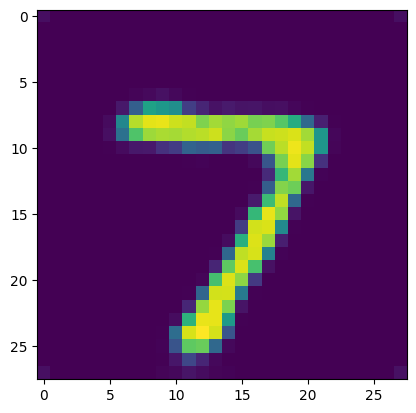

In [184]:
mnist_ae.fit(x_train, x_train, batch_size=256)
x_test_reconstructed = mnist_ae(x_test)
plt.imshow(x_test_reconstructed[0,:])

### Exercise 3 - Autoencoders for Denoising

**Summary:**
In this exercise you will build and train an autoencoder to remove noise from images. We can do this by starting with "clean" image-data and adding artifical noise to it. The training subjective for the autoencoder is to reconstruct the "clean" image from the noisy input. 

**Data**: 
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data. 
* Create a noisy input dataset by adding artificial noise to the mnist data. We can put noise into an image by simply adding a random vector (you can use ```np.random.randn()``` to create random noise-tensors). 
* Train your autoencoder model using a suitable loss function. 
* Evaluate your results on the (noisy and clean) test portion of the mnist dataset, visualize your results. 


**Find out and Answer:**
* What loss function did you choose and why?
* How many layers do you need and how many filters for each layer do you need to get satisfying results?
* What is the highest amount of noise (standard deviation of the gaussian distribution used to generate the noise) the autoencoder can still handle?

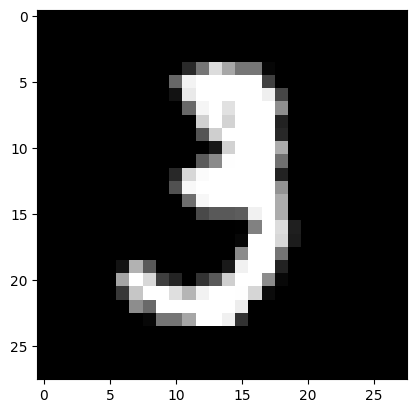

In [160]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

### Solution 3 - Autoencoders for Denoising

In [172]:
x_train_noise = x_train + 0.05 * np.random.randn(*x_train.shape)
x_test_noise = x_test + 0.05 * np.random.randn(*x_test.shape)


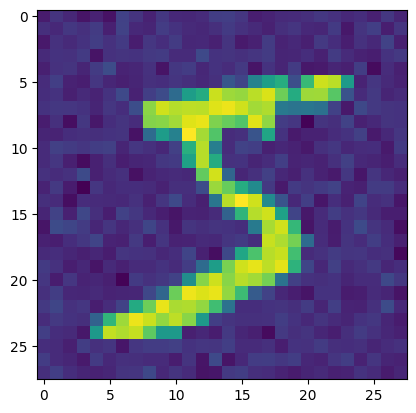

In [162]:
plt.imshow(x_train_noise[0,:])

In [179]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer, Flatten, Reshape, MaxPooling2D
import numpy as np 

mnist_ae2 = tf.keras.Sequential()
mnist_ae2.add(InputLayer(input_shape=(28,28,1)))
mnist_ae2.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), activation='relu', padding='same'))
mnist_ae2.add(Conv2D(filters=32, kernel_size=(4,4),  strides=(2,2), activation='relu', padding='same'))

mnist_ae2.add(Conv2DTranspose(filters=32, kernel_size=(4,4), strides=(2,2),  activation='relu', padding='same'))
mnist_ae2.add(Conv2DTranspose(filters=16, kernel_size=(4,4), strides=(2,2),  activation='relu',padding='same'))
mnist_ae2.add(Conv2D(filters=1, kernel_size=(1,1),  activation='sigmoid',padding='same'))


mnist_ae2.compile(loss='mse')
mnist_ae2.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_176 (Conv2D)         (None, 14, 14, 16)        272       
                                                                 
 conv2d_177 (Conv2D)         (None, 7, 7, 32)          8224      
                                                                 
 conv2d_transpose_134 (Conv2  (None, 14, 14, 32)       16416     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_135 (Conv2  (None, 28, 28, 16)       8208      
 DTranspose)                                                     
                                                                 
 conv2d_178 (Conv2D)         (None, 28, 28, 1)         17        
                                                                 
Total params: 33,137
Trainable params: 33,137
Non-tra

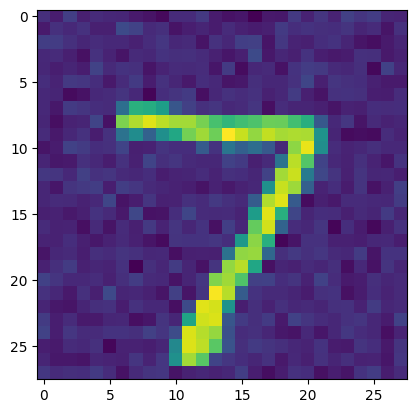

In [182]:
plt.imshow(x_test_noise[0,:])

235/235 [==============================] - 26s 97ms/step - loss: 0.0300


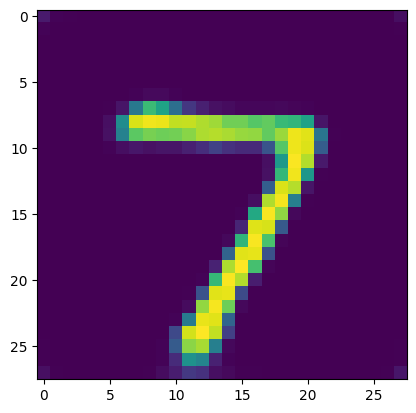

In [180]:
mnist_ae2.fit(x_train_noise, x_train, batch_size=256, epochs=1)
x_test_reconstructed = mnist_ae2(x_test_noise)
plt.imshow(x_test_reconstructed[0,:])

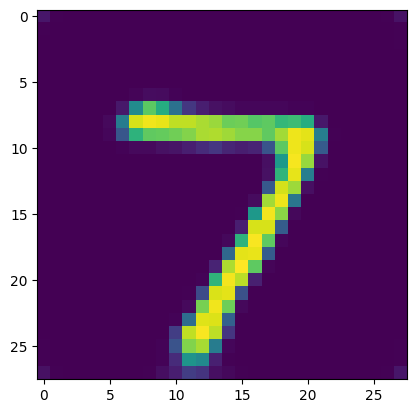

In [181]:
x_test_reconstructed = mnist_ae2(x_test)
plt.imshow(x_test_reconstructed[0,:])

### Exercise 4 - Latent Space of an Autoencoder


**Summary:**


**Data**: 
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build an train an autoencoder for the mnist data. 
* Split the autoencoder model into an encoder and decoder part (use the functional API via ```tf.keras.Model(inputs=, outputs=)```).
* Compute the latent vector for an image.
* Modify the latent vector and reconstruct it, compare it to the original.
* Create a random latent vector and reconstruct it, compare it to the original. 

**Find out and Answer:**
* How does modifying the latent vector influence the reconstruction result ?





In [185]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [186]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer, Flatten, Reshape, MaxPooling2D
import numpy as np 

ae4 = tf.keras.Sequential()
ae4.add(InputLayer(input_shape=(28,28,1)))
ae4.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), activation='relu', padding='same'))
ae4.add(Conv2D(filters=32, kernel_size=(4,4),  strides=(2,2), activation='relu', padding='same'))

ae4.add(Conv2DTranspose(filters=32, kernel_size=(4,4), strides=(2,2),  activation='relu', padding='same'))
ae4.add(Conv2DTranspose(filters=16, kernel_size=(4,4), strides=(2,2),  activation='relu',padding='same'))
ae4.add(Conv2D(filters=1, kernel_size=(1,1),  activation='sigmoid',padding='same'))

ae4.compile(loss='mse')
ae4.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 14, 14, 16)        272       
                                                                 
 conv2d_183 (Conv2D)         (None, 7, 7, 32)          8224      
                                                                 
 conv2d_transpose_138 (Conv2  (None, 14, 14, 32)       16416     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_139 (Conv2  (None, 28, 28, 16)       8208      
 DTranspose)                                                     
                                                                 
 conv2d_184 (Conv2D)         (None, 28, 28, 1)         17        
                                                                 
Total params: 33,137
Trainable params: 33,137
Non-tra

In [187]:
ae4.fit(x_train, x_train)

1875/1875 [==============================] - 64s 34ms/step - loss: 0.0055


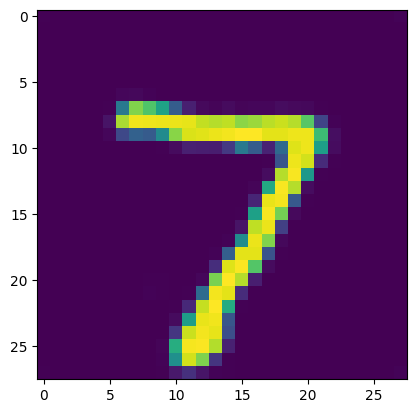

In [188]:
x_test_rec = ae4(x_test)
plt.imshow(x_test_rec[0,:])

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 14, 14, 16)        272       
                                                                 
 conv2d_183 (Conv2D)         (None, 7, 7, 32)          8224      
                                                                 
 conv2d_transpose_138 (Conv2  (None, 14, 14, 32)       16416     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_139 (Conv2  (None, 28, 28, 16)       8208      
 DTranspose)                                                     
                                                                 
 conv2d_184 (Conv2D)         (None, 28, 28, 1)         17        
                                                                 
Total params: 33,137
Trainable params: 33,137
Non-tra

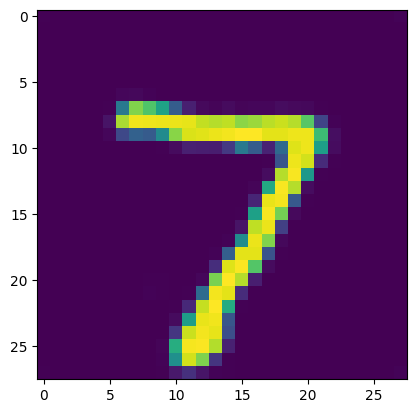

In [228]:
ae4.summary()

encoder = tf.keras.Model(inputs=ae4.input, outputs=ae4.layers[1].output)
decoder = tf.keras.Model(inputs=ae4.layers[2].input, outputs=ae4.output)

latent = encoder(np.array([x_test[0,:]]))
latent = np.array(latent)
decoded = decoder(latent)
plt.imshow(decoded[0,:])

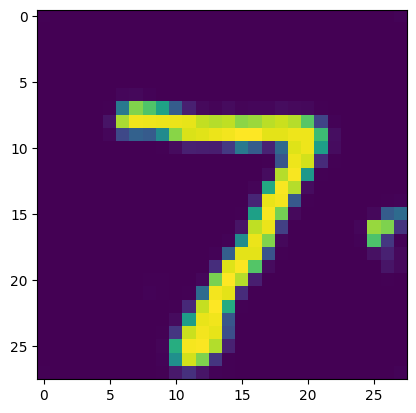

In [229]:
latent[0,4,6,2] = -8
decoded = decoder(latent)
plt.imshow(decoded[0,:])

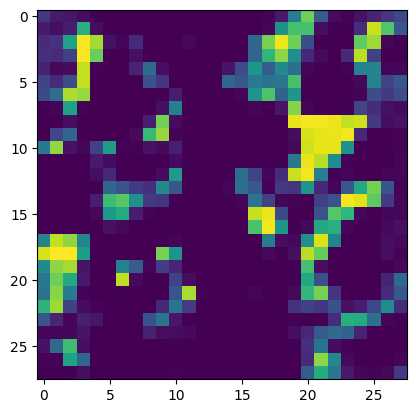

In [227]:
random_latent = np.random.randn(1,7,7,32)
decoded = decoder(random_latent)
plt.imshow(decoded[0,:])

### Exercise 5 - Variational Autoencoder

In [230]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()




Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_96 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_185 (Conv2D)            (None, 14, 14, 32)   320         ['input_96[0][0]']               
                                                                                                  
 conv2d_186 (Conv2D)            (None, 7, 7, 64)     18496       ['conv2d_185[0][0]']             
                                                                                                  
 flatten_8 (Flatten)            (None, 3136)         0           ['conv2d_186[0][0]']             
                                                                                            

In [231]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_97 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_140 (Conv2  (None, 14, 14, 64)       36928     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_141 (Conv2  (None, 28, 28, 32)       18464     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_142 (Conv2  (None, 28, 28, 1)        289 

In [232]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [233]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 45s 78ms/step - loss: 255.7543 - reconstruction_loss: 207.7245 - kl_loss: 2.9683
Epoch 2/30
547/547 [==============================] - 43s 78ms/step - loss: 173.5416 - reconstruction_loss: 164.5618 - kl_loss: 4.9892
Epoch 3/30
547/547 [==============================] - 43s 79ms/step - loss: 162.5744 - reconstruction_loss: 156.0848 - kl_loss: 5.3229
Epoch 4/30
547/547 [==============================] - 43s 78ms/step - loss: 159.2332 - reconstruction_loss: 152.9957 - kl_loss: 5.5563
Epoch 5/30
547/547 [==============================] - 43s 78ms/step - loss: 156.9714 - reconstruction_loss: 151.3021 - kl_loss: 5.6689
Epoch 6/30
547/547 [==============================] - 43s 79ms/step - loss: 155.7596 - reconstruction_loss: 149.9828 - kl_loss: 5.7651
Epoch 7/30
547/547 [==============================] - 43s 78ms/step - loss: 154.5711 - reconstruction_loss: 148.9827 - kl_loss: 5.8357
Epoch 8/30
547/547 [==============================] - 4

KeyboardInterrupt: 

1/1 [==============================] - 0s 60ms/step


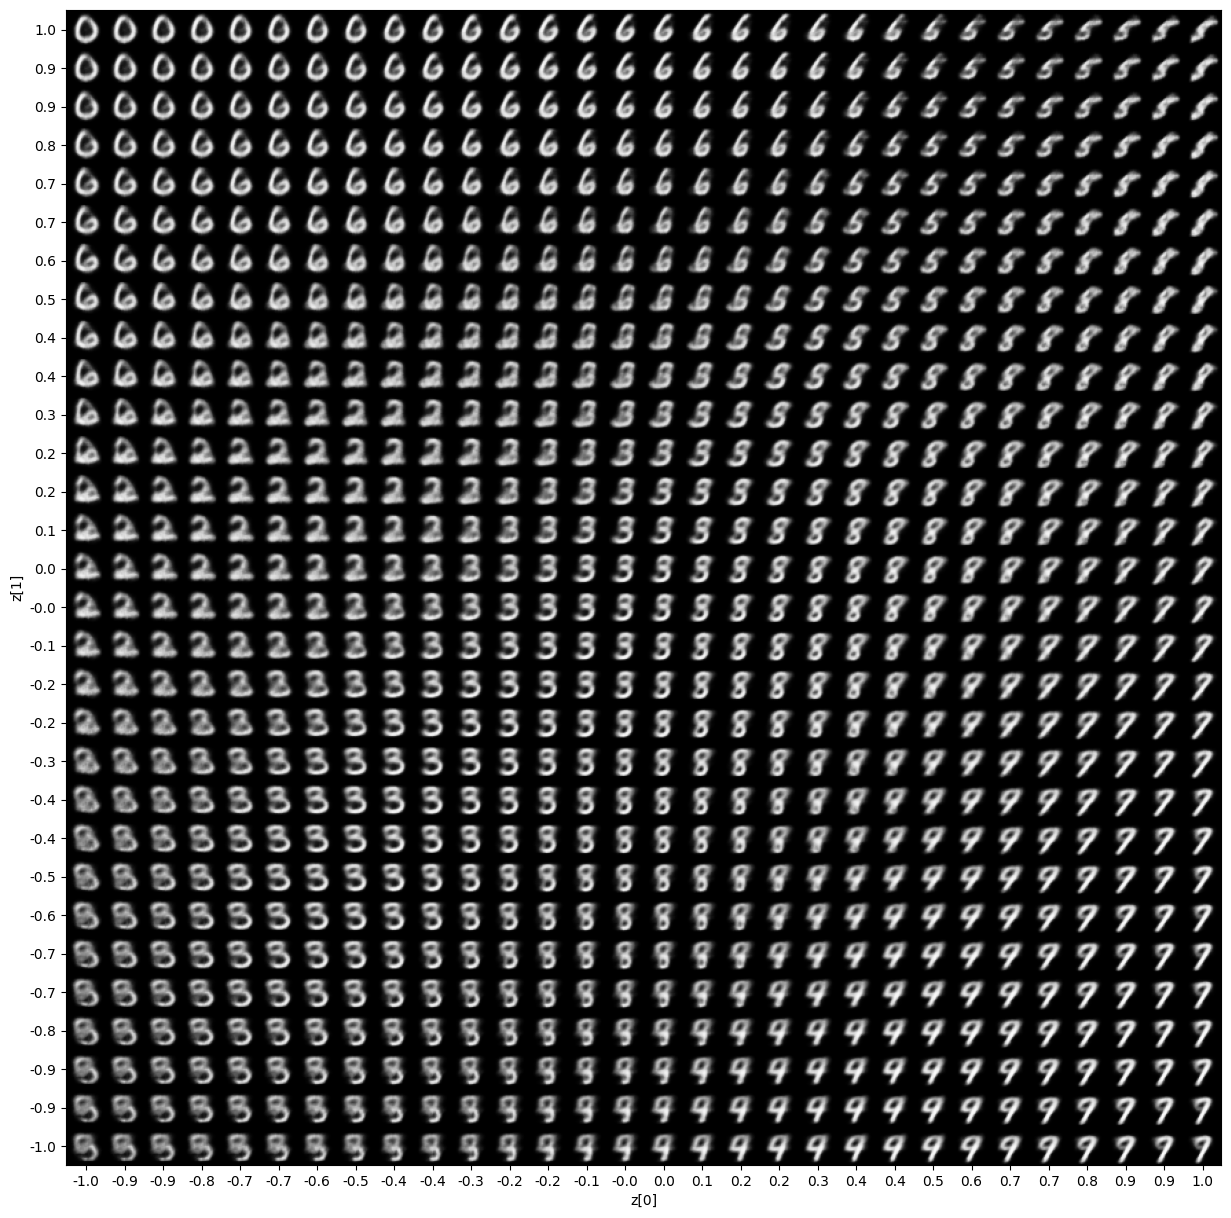

In [235]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

1875/1875 [==============================] - 32s 17ms/step


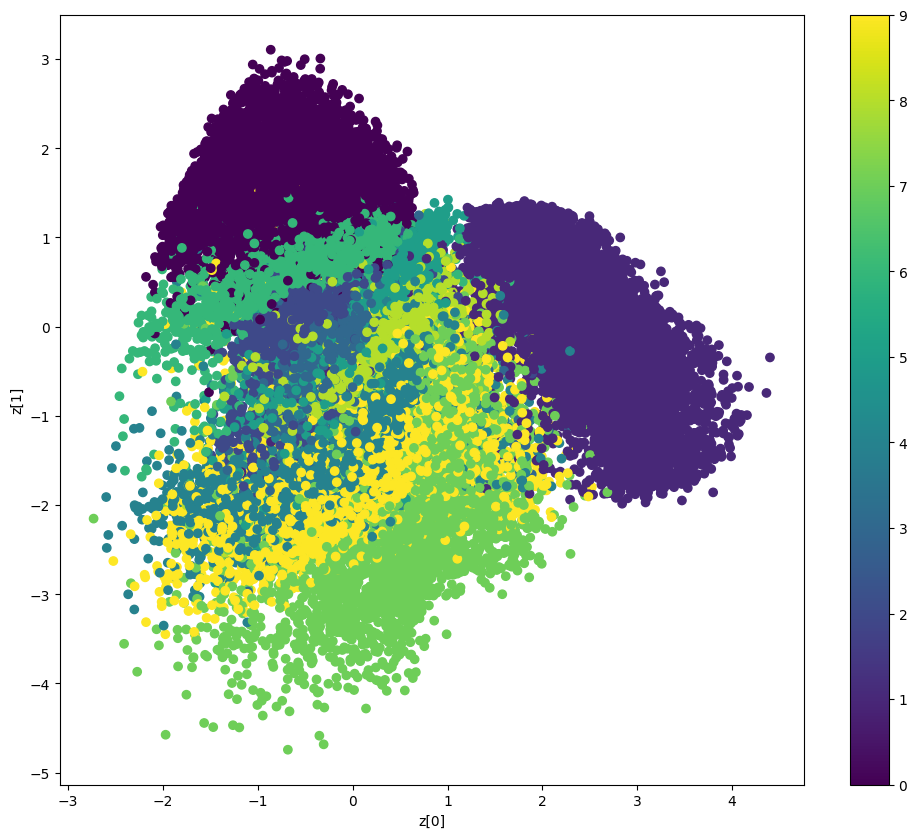

In [236]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

In [1]:
import tensorflow as tf

# Autoencoder
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
X_train = X_train / 255.0
X_test = X_test / 255.0

2023-03-29 16:10:39.771087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 16:10:39.987831: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-29 16:10:40.079859: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-29 16:10:40.938086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
# add noise to trainig data
import numpy as np 

X_train_noise = X_train + 0.1*np.random.randn(*X_train.shape)
X_test_noise = X_test + 0.1*np.random.randn(*X_test.shape)

plt.figure(figsize=(2,2))
plt.imshow(X_train_noise[0,:])

NameError: name 'plt' is not defined

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout

latent_dim = 128

# Encoder Part
#
input = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="same")(input)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding="same")(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding="same")(x)      

# Decoder Part

x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
decoded = tf.keras.layers.Conv2D(3, (3,3), activation="sigmoid", padding="same")(x)

decoder = tf.keras.Model(input, decoded)
decoder.summary()


autoencoder = tf.keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

2023-03-30 11:20:16.491836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 11:20:16.610147: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-30 11:20:16.642058: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-30 11:20:17.304495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       36928 

2023-03-30 11:20:17.974128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-30 11:20:17.974148: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-30 11:20:17.974410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
autoencoder.fit(X_train_noise, X_train, epochs=50, validation_data=(X_test, X_test))

Epoch 1/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 2/50
  75/1563 [>.............................] - ETA: 19s - loss: 0.0033

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


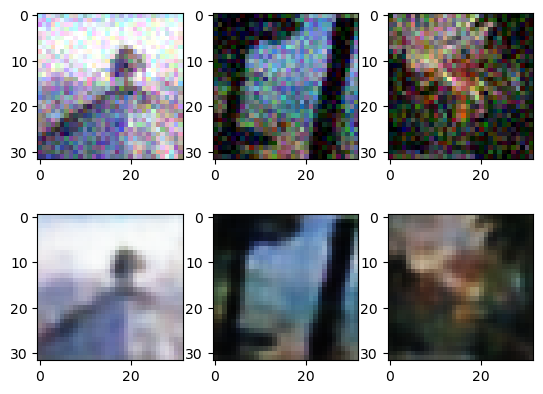

In [7]:
import matplotlib.pyplot as plt
tmp = autoencoder(X_test_noise)

f, ax = plt.subplots(2,3)

ax[0,0].imshow(X_test_noise[0,:])
ax[1,0].imshow(tmp[0,:])

ax[0,1].imshow(X_test_noise[10,:])
ax[1,1].imshow(tmp[10,:])


ax[0,2].imshow(X_test_noise[100,:])
ax[1,2].imshow(tmp[100,:])



In [84]:
#add watermark to image
import cv2

img = X_train[0,:]

wm = cv2.imread('watermark.png')

In [131]:
# prepare landscape data
import os

def apply_forall(directory, filter, action):
    print(directory)
    for root, dirs, files in os.walk(directory):
        print(files)
        print(file)
        for file in files:
            if filter(file):
                print('applying action to: %s' % file)
                action(file)
        for dir in dirs:
            apply_forall(dir, filter, action)



In [125]:
def extract_and_store(file):
    pass

In [132]:
apply_forall(r"C:\\Work\\Data\\Landscape Classification\\Training Data\\Coast", lambda x: x.endswith('.png'), extract_and_store(x))

C:\\Work\\Data\\Landscape Classification\\Training Data\\Coast


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, Conv2DTranspose, LeakyReLU, GlobalMaxPooling2D, Reshape, BatchNormalization, Flatten, GlobalAveragePooling2D, Dropout, ReLU
from tensorflow.keras.activations import sigmoid
import numpy as np

import os
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

2023-03-31 10:53:32.713854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 10:53:32.824502: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 10:53:32.855689: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-31 10:53:33.419473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [26]:
def custom_loss(truth, reconstructed):
    return tf.reduce_mean(1-tf.image.ssim(truth, reconstructed, max_val=1) + 0.3 * tf.reduce_mean(tf.square(truth - reconstructed)))

In [64]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout

def add_identity_block(input, num_filters=1):
    x_skip = input
    y = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding='same')(input)
    y = tf.keras.layers.BatchNormalization(axis=3)(y)
    y = tf.keras.layers.Activation('relu')(y)
    y = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding='same')(y)
    y = tf.keras.layers.BatchNormalization(axis=3)(y)
    y = tf.keras.layers.Add()([y, x_skip])
    out = tf.keras.layers.Activation('relu')(y) 
    return out

def add_convolution_block(input, num_filters=1):
    x_skip = input

    # Feed the skip connection through a 1x1 Conv Layer to make it the correct shape
    x_skip = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(1,1), padding='same')(input)
    
    # This is just the identity thingy
    y = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding='same')(input)
    y = tf.keras.layers.BatchNormalization(axis=3)(y)
    y = tf.keras.layers.Activation('relu')(y)
    y = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding='same')(y)
    y = tf.keras.layers.BatchNormalization(axis=3)(y)
    y = tf.keras.layers.Add()([y, x_skip])
    out = tf.keras.layers.Activation('relu')(y) 
    return out


# Encoder Part
#
input = tf.keras.Input(shape=(128,128,3))
x = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding="same")(input)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding="same")(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding="same")(x)      
x = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="same")(x) 

# Decoder Part
x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
decoded = tf.keras.layers.Conv2D(3, (3,3), activation="sigmoid", padding="same")(x)

decoder = tf.keras.Model(input, decoded)
decoder.summary()


autoencoder = tf.keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss=custom_loss)
autoencoder.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_36 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 128)       738

In [77]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
import os
import numpy as np

# Fills images with masked sections. Used to train an autoencoder that can can fill masked sections. 
# Does not perform preprocessing. Only fills in masked sections, can use data augmentation (applied after masking).
# Returns (X_corrupted, X_real) on each batch.
#
class CorruptingDataGenerator(keras.utils.Sequence):

    def __init__(self, X, batch_size, use_augmentation=False):
        self._batch_size = batch_size
        self._use_augmentation = use_augmentation
        self._X = X

        self._augmentor = image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(self._X.shape[0]) / self._batch_size)

    def on_epoch_end(self):
        self._indices = np.arange(self._X.shape[0])
        np.random.shuffle(self._indices)

        self._X_corrupted = np.copy(self._X)
        for idx in range(self._X_corrupted.shape[0]):
            self.__corrupt__(self._X_corrupted[idx,:])


    def __corrupt__(self, x):
        # Add some random black garbage
        rect_width = np.random.randint(0,32)
        rect_height = np.random.randint(0,32)

        start_point_x = np.random.randint(0,128-rect_width)
        start_point_y = np.random.randint(0,128-rect_height)

        # Fill with large values will increase the impact on the MSE and force the ae
        # to change this, notice that the rest of the image data is scaled between 0,1 so 
        # this will have a significant impact. Maybe we need a smarter loss function for this to balance. 
        #cv2.rectangle(x, (start_point_x, start_point_y), (start_point_x+rect_width, start_point_y+rect_height), (1,1,1), -1)
        cv2.circle(x, (start_point_x, start_point_y), 5, (2,2,2), -1)


    def __getitem__(self, index):
        indices = self._indices[index * self._batch_size:(index+1)*self._batch_size]

        X_batch_orig = self._X[indices,:]
        X_batch_corrupted = self._X_corrupted[indices,:]


        return X_batch_corrupted, X_batch_orig

In [47]:
import os 
import cv2
X = []
for root,_,files in os.walk('/data1/home/hese/data/landscapes-128x128/Training Data'):
    for file in files:
        img = cv2.imread(os.path.join(root, file))
        X.append(img)

X = np.array(X)
X_train = X / 255.0

In [78]:
datagen = CorruptingDataGenerator(X_train, 128)

In [86]:
xc,xo = datagen.__getitem__(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


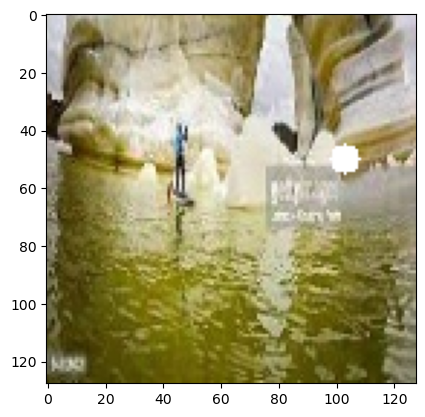

In [87]:
plt.imshow(xc[10,:])

In [100]:
autoencoder.fit(datagen, epochs=100)

Epoch 1/100
77/77 [==============================] - 14s 186ms/step - loss: 0.0646
Epoch 2/100
77/77 [==============================] - 14s 186ms/step - loss: 0.0628
Epoch 3/100
77/77 [==============================] - 14s 187ms/step - loss: 0.0607
Epoch 4/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0614
Epoch 5/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0617
Epoch 6/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0621
Epoch 7/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0607
Epoch 8/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0624
Epoch 9/100
77/77 [==============================] - 15s 188ms/step - loss: 0.0604
Epoch 10/100
77/77 [==============================] - 15s 189ms/step - loss: 0.0608
Epoch 11/100
77/77 [==============================] - 15s 189ms/step - loss: 0.0609
Epoch 12/100
77/77 [==============================] - 15s 189ms/step - loss: 0.0608
E

KeyboardInterrupt: 

In [99]:
autoencoder.save('corruption_autoencoder.h5')

In [47]:
pwd

'/data1/home/hese'

In [66]:
plt.imshow(Y[0,:])

NameError: name 'Y' is not defined

In [91]:
X_rec = autoencoder(xc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


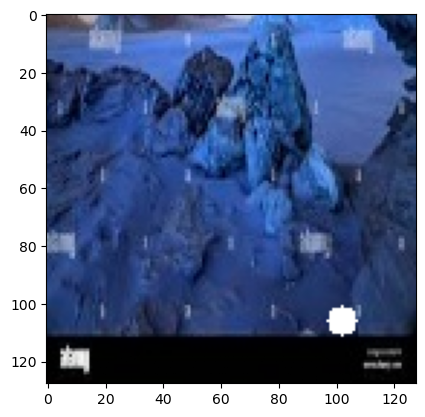

In [97]:
plt.imshow(xc[102,:])

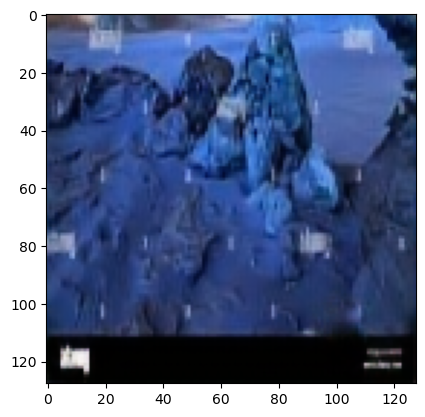

In [98]:
plt.imshow(X_rec[102,:])

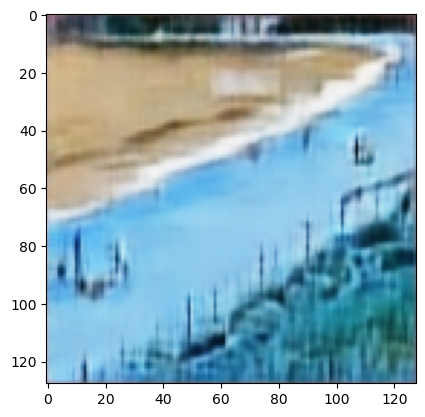

In [97]:
plt.imshow(X_rec[17,:])

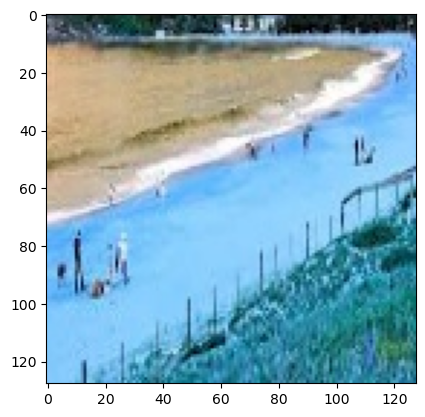

In [82]:
plt.imshow(X[17,:])

# Context Autoencoder

In [355]:
# context encoder will try to reconstruct only the damaged part of the input
# but we show a larger part of the input the the context encoder

context_model = tf.keras.Sequential()
context_model.add(InputLayer(input_shape=(128,128,3)))
context_model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'))
context_model.add(MaxPooling2D(pool_size=(2,2)))

context_model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'))
context_model.add(MaxPooling2D(pool_size=(2,2)))

context_model.add(Conv2D(filters=128, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'))
context_model.add(MaxPooling2D(pool_size=(2,2)))

context_model.add(Conv2D(filters=256, kernel_size=(4,4), strides=(2,2), padding='same', activation='relu'))
context_model.add(MaxPooling2D(pool_size=(2,2)))

context_model.add(Conv2D(filters=512, kernel_size=(4,4), strides=(2,2), padding='same', activation='relu'))


context_model.add(Conv2DTranspose(filters=512, kernel_size=(4,4), strides=(2, 2),  padding='same', activation='relu'))
context_model.add(Conv2DTranspose(filters=256, kernel_size=(4,4),  strides=(2, 2), padding='same', activation='relu'))
context_model.add(Conv2DTranspose(filters=128, kernel_size=(4,4),  strides=(2, 2), padding='same', activation='relu'))
context_model.add(Conv2DTranspose(filters=128, kernel_size=(4,4),  strides=(2, 2), padding='same', activation='relu'))
context_model.add(Conv2DTranspose(filters=128, kernel_size=(4,4),  strides=(2, 2), padding='same', activation='relu'))
context_model.add(Conv2D(filters=3, kernel_size=(1,1), padding='same', activation='sigmoid'))


context_model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_272 (Conv2D)         (None, 128, 128, 64)      3136      
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 64, 64, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_273 (Conv2D)         (None, 64, 64, 64)        65600     
                                                                 
 max_pooling2d_113 (MaxPooli  (None, 32, 32, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, 32, 32, 128)       131200    
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 16, 16, 128)    

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
import os
import numpy as np

# Fills images with masked sections. Used to train an autoencoder that can can fill masked sections. 
# Does not perform preprocessing. Only fills in masked sections, can use data augmentation (applied after masking).
# Returns (X_corrupted, X_real) on each batch.
#
class ContextEncoderDataGenerator(keras.utils.Sequence):

    def __init__(self, X, batch_size, use_augmentation=False):
        self._batch_size = batch_size
        self._use_augmentation = use_augmentation
        self._X = X

        self._augmentor = image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(self._X.shape[0]) / self._batch_size)

    def on_epoch_end(self):
        self._indices = np.arange(self._X.shape[0])
        np.random.shuffle(self._indices)
        self._start_points = []

        self._X_corrupted = np.copy(self._X)
        self._X_corrupted_gt = np.zeros(shape=(self._X.shape[0], 32, 32, 3))
        for idx in range(self._X_corrupted.shape[0]):
            corrupted_x_gt, (start_x, start_y) = self.__corrupt__(self._X_corrupted[idx,:])
            self._X_corrupted_gt[idx,:] = corrupted_x_gt
            self._start_points[idx] = (start_x, start_y)


    def __corrupt__(self, x):
        # Add some random black garbage
        rect_width = 32
        rect_height = 32

        start_point_x = np.random.randint(0,128-rect_width)
        start_point_y = np.random.randint(0,128-rect_height)

        # Extract the corrupted region, we need it for computing the loss
        # 
        corrupted_x_gt = np.copy(x[start_point_x:start_point_x + rect_width, start_point_y:start_point_y + rect_height])

        # Fill with large values will increase the impact on the MSE and force the ae
        # to change this, notice that the rest of the image data is scaled between 0,1 so 
        # this will have a significant impact. Maybe we need a smarter loss function for this to balance. 
        cv2.rectangle(x, (start_point_x, start_point_y), (start_point_x+rect_width, start_point_y+rect_height), (1,1,1), -1)

        return corrupted_x_gt, (start_point_x, start_point_y)

    # This returns:
    # - the full image with corrupted region as first parameter
    # - the correct region as the second parameter
    #
    def __getitem__(self, index):
        indices = self._indices[index * self._batch_size:(index+1)*self._batch_size]

        start_points = self._start_points[indices]
        #X_batch_orig = self._X[indices,:]
        X_batch_corrupted = self._X_corrupted[indices,:]
        X_batch_corrupted_gt = self._X_corrupted_gt[indices,:]

        return X_batch_corrupted, X_batch_corrupted_gt, start_points

In [327]:
datagen = ContextEncoderDataGenerator(X_train, 128)


In [328]:
xc,xo = datagen.__getitem__(0)

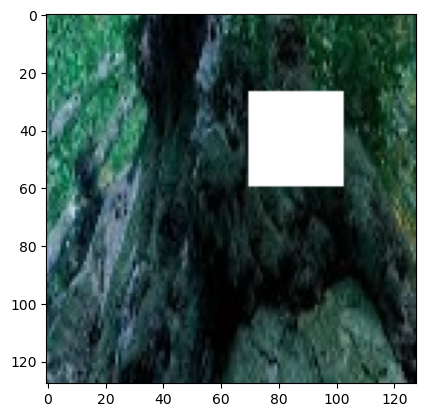

In [329]:
plt.imshow(xc[0,:])

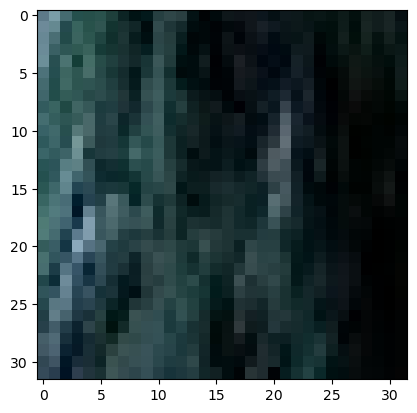

In [330]:
plt.imshow(xo[0,:])

In [356]:
class ContextAutoencoder(tf.keras.Model):
    def __init__(self, model):
        super(ContextAutoencoder, self).__init__()
        self._model = model
        self._gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")

    
    def train_step(self, batch_input):
        X = batch_input[0]
        Y = batch_input[1]
    
        with tf.GradientTape() as tape:
            X_pred = self._model(X)
            
            # Compute L2 loss
            loss = tf.sqrt(tf.reduce_sum(tf.square(X_pred - Y)))

        encoder_grad = tape.gradient(loss, self._model.trainable_weights)
        self._gen_opt.apply_gradients(zip(encoder_grad, self._model.trainable_weights))
        self._gen_loss_tracker.update_state(loss)
    
        return {
            "g_loss": self._gen_loss_tracker.result()
        }

    def compile(self, gen_opt, disc_opt, run_eagerly=False):
        super(ContextAutoencoder, self).compile(run_eagerly=run_eagerly)
        self._gen_opt = gen_opt
        self._disc_opt = disc_opt
    
        

In [357]:
from tensorflow.keras.optimizers import Adam
gen_opt = Adam()
disc_opt = Adam()

context_autoencoder = ContextAutoencoder(context_model)
context_autoencoder.compile(gen_opt, disc_opt, run_eagerly=True)

In [358]:
context_autoencoder.fit(datagen, epochs=100)

Epoch 1/100


2023-04-03 17:20:55.863850: W tensorflow/core/framework/op_kernel.cc:1768] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:Sub]

In [279]:
context_model.save('context_autoencoder_32x32.h5')

In [344]:
x,y = datagen.__getitem__(0)
y.shape

(128, 32, 32, 3)

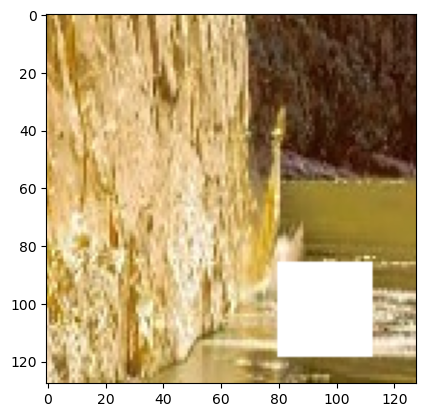

In [350]:
ind = 10
plt.imshow(x[ind,:])

In [351]:
rec = context_model(x)

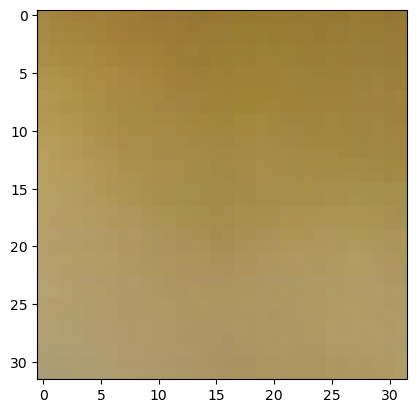

In [352]:
plt.imshow(rec[ind,:])

In [338]:
tmp = x[ind,:]
tmp[32:32+64,32:32+64] = rec[ind,:]
plt.imshow(tmp)

ValueError: could not broadcast input array from shape (32,32,3) into shape (64,64,3)